In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import logging
from datetime import datetime
from random import choice
from copy import deepcopy
import sys

In [4]:
from library import PluginTools

In [7]:
try:
    from . import layout
    from . import constants
except ImportError:
    import layout 
    import constants

In [8]:
def time_list(time):
    '''Returns time as list [h, m] of type int
    
    Args:
        time(`str`): time in colon separated format - 09:34; 23:15'''
    return  [int(i)  for i in time.split(':')]


In [9]:
def time_now():
    return datetime.now().strftime("%H:%M")

In [10]:
def map_val(a, b, s):
    '''map range `a` to `b` for value `s`

    Args:
        a(2 `tuple` of `int`): (start, end) of input values
        b(2 `tuple` of `int`): (start, end) of output values
        s(`float`, `int`): value to map
    Returns:
        `int`'''
    a1, a2 = a
    b1, b2 = b
    
    t = b1 + ((s-a1) * (b2-b1))/(a2-a1)
    
    return round(t)

In [11]:
def update_function(self, time=None):
    '''update function for word_clock provides time as text
    
    This plugin provides the time as a string such as:
        * The time is around ten twenty
        * It is about twenty after eight
    
    Args:
        self(`namespace`)
        time(`str`): time as a string in format HH:MM (primarily used for testing)
        
    Returns:
        tuple: (is_updated(bool), data(dict), priority(int))    
    %U'''
    logging.info(f'update_function for {self.name}')
    hours = constants.hours
    minutes = constants.minutes
    stems = constants.stems
    
    if time:
        now = time
        logging.debug(f'using {time}')
        t_list = time_list(time)
    else:
        now = time_now()
        logging.debug(f'using {now}')
        t_list = time_list(now)
        
    # this range shifts the period of the list so times around the 'tens' round nicely up and down        
    minute = map_val((1, 59), (0, 6), t_list[1])

    # set the hour appropriately - from 'after' to 'til'
    if t_list[1] <= 34:
        hour_str = hours[str(t_list[0])]
    else:
        try:
            hour_str = hours[str(t_list[0]+1)]
        except KeyError as e:
            # wrap around to zero'th index in the hours list
            hour_str = hours[str(t_list[0]+1 - len(hours))]
            hour_str = hours[str(0)]
        
    min_str = minutes[str(minute)]
    
    # properly organize the time string
    # 'o clock times
    if minute == 0 or minute == 6:
        time_str = f'{choice(hour_str).title()} {choice(min_str).title()}'
                      
    else: 
        time_str = f'{choice(min_str).title()} {choice(hour_str).title()}'
    
    
    myTime = {'wordtime': f'{choice(stems)} {time_str}',
              'time': now}
    

    if 'text_color' in self.config or 'bkground_color' in self.config:
        logging.info('using user-defined colors')
        colors = PluginTools.text_color(config=self.config, mode=self.screen_mode,
                               default_text=self.layout.get('fill', 'WHITE'),
                               default_bkground=self.layout.get('bkground', 'BLACK'))

        text_color = colors['text_color']
        bkground_color = colors['bkground_color']


        # set the colors
        for section in self.layout:
            if self.layout[section].get('rgb_support', False):
                logging.debug(f'setting {section} layout colors to fill: {text_color}, bkground: {bkground_color}')
                self.layout_obj.update_block_props(section, {'fill': text_color, 'bkground': bkground_color})
            else:
                logging.debug(f'section {section} does not support RGB colors')
    
    
    return (True, myTime, self.max_priority)

DEBUG:root:wordtime supports RGB
DEBUG:root:time supports RGB
DEBUG:root:[[----checking default values for layout----]
DEBUG:root:section: [-----------wordtime-----------]
DEBUG:root:adding "maxchar: None"
DEBUG:root:adding "dimensions: None"
DEBUG:root:section: [-------------time-------------]
DEBUG:root:adding "maxchar: None"
DEBUG:root:adding "dimensions: None"
DEBUG:root:[[....calculating layouts....]]
INFO:root:section: [...........wordtime...........]
DEBUG:root:resolution: (800, 600)
DEBUG:root:width: 1, height: 0.9
DEBUG:root:absolute coordinates provided
DEBUG:root:block coordinates: (0, 0)
INFO:root:section: [.............time.............]
DEBUG:root:resolution: (800, 600)
DEBUG:root:width: 1, height: 0.1
DEBUG:root:calculating block position from relative positions
DEBUG:root:block coordinates: (0, 540)
DEBUG:root:layout config: resolution, (800, 600), force_onebit: False, mode: RGB
INFO:root:[[____SETTING SECTION BLOCKS____]]
INFO:root:setting section: [___________wordtime

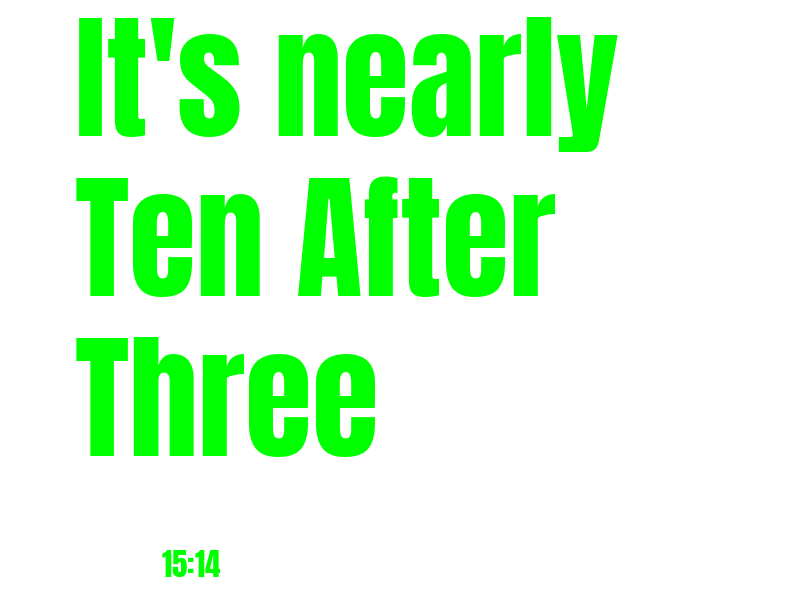

In [13]:
# # this code snip simulates running from within the display loop use this and the following
# # cell to test the output
# import logging
# logging.root.setLevel('DEBUG')
# from library.CacheFiles import CacheFiles
# from library.Plugin import Plugin
# from IPython.display import display
# test_plugin = Plugin(resolution=(800, 600), screen_mode='RGB')
# test_plugin.config = {
#     'text_color': 'random',
#     'bkground_color': 'White'
# }
# test_plugin.refresh_rate = 5
# l = layout.layout
# test_plugin.layout = l
# test_plugin.cache = CacheFiles()
# test_plugin.update_function = update_function
# test_plugin.update()
# test_plugin.image

In [ ]:
# test_plugin.force_update()
# test_plugin.image

In [14]:
!jupyter-nbconvert --to python --template python_clean word_clock.ipynb

[NbConvertApp] Converting notebook word_clock.ipynb to python
[NbConvertApp] Writing 4440 bytes to word_clock.py
